In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = "png"

COLORS = [
    "#6B3A2A", "#8B5E3C", "#A0522D", "#C68E6E", "#D2A679",
    "#E6C9A8", "#F5DEB3", "#DEB887", "#D2B48C", "#BC8F6F",
    "#A47551", "#7B4B3A", "#4E3226", "#C4A77D", "#B8860B",
    "#DAA06D", "#E8CEAB", "#F0E0C8", "#C19A6B", "#A67B5B",
    "#8C6545", "#6F4E37", "#5C3D2E", "#D4A76A", "#BFA07A",
]

df = pd.read_csv("data/raw/Chocolate_Sales.csv")

# Clean Amount column: remove $ and commas, convert to float
df["Amount"] = df["Amount"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)

# Parse Date column
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Month"] = df["Date"].dt.to_period("M").astype(str)

df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02


In [2]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   str           
 1   Country        3282 non-null   str           
 2   Product        3282 non-null   str           
 3   Date           3282 non-null   datetime64[us]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
 6   Month          3282 non-null   str           
dtypes: datetime64[us](1), float64(1), int64(1), str(4)
memory usage: 312.0 KB


,Date,Amount,Boxes Shipped
count,3282,3282.000000,3282.000000
mean,2023-05-03 15:09:06.252285,6030.338775,164.666971
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-07-04 00:00:00,2521.495000,71.000000
50%,2023-05-11 00:00:00,5225.500000,137.000000
75%,2024-03-02 00:00:00,8556.842500,232.000000
max,2024-08-31 00:00:00,26170.950000,778.000000
std,NaN,4393.980200,124.024736


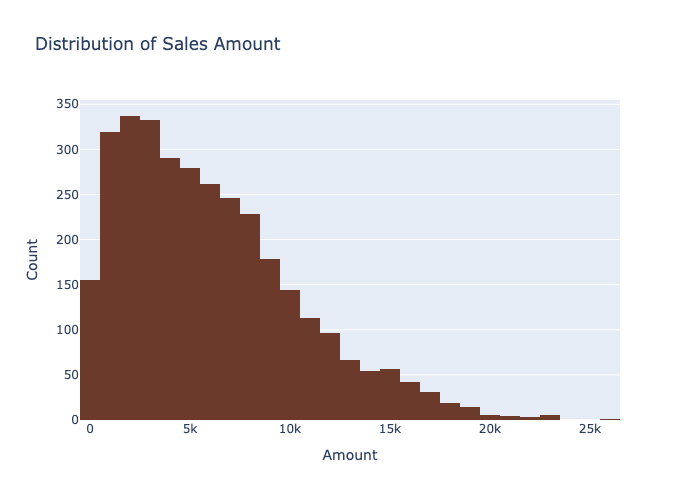

In [3]:
# Distribution of Sales Amount
fig = go.Figure(go.Histogram(x=df["Amount"], nbinsx=30, marker_color=COLORS[0]))
fig.update_layout(title="Distribution of Sales Amount", xaxis_title="Amount", yaxis_title="Count")
fig.show()

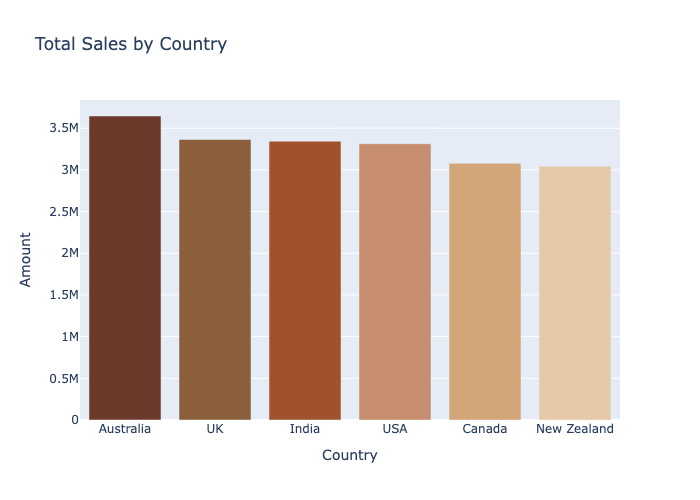

In [4]:
# Total Sales by Country
sales_by_country = df.groupby("Country", as_index=False)["Amount"].sum().sort_values("Amount", ascending=False)
fig = go.Figure(go.Bar(
    x=sales_by_country["Country"],
    y=sales_by_country["Amount"],
    marker_color=COLORS[:len(sales_by_country)],
))
fig.update_layout(title="Total Sales by Country", xaxis_title="Country", yaxis_title="Amount")
fig.show()

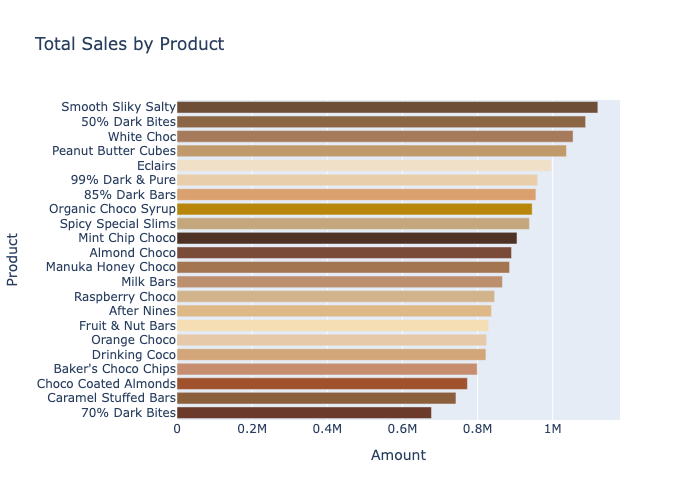

In [5]:
# Total Sales by Product
sales_by_product = df.groupby("Product", as_index=False)["Amount"].sum().sort_values("Amount")
fig = go.Figure(go.Bar(
    x=sales_by_product["Amount"],
    y=sales_by_product["Product"],
    orientation="h",
    marker_color=COLORS[:len(sales_by_product)],
))
fig.update_layout(title="Total Sales by Product", xaxis_title="Amount", yaxis_title="Product")
fig.show()

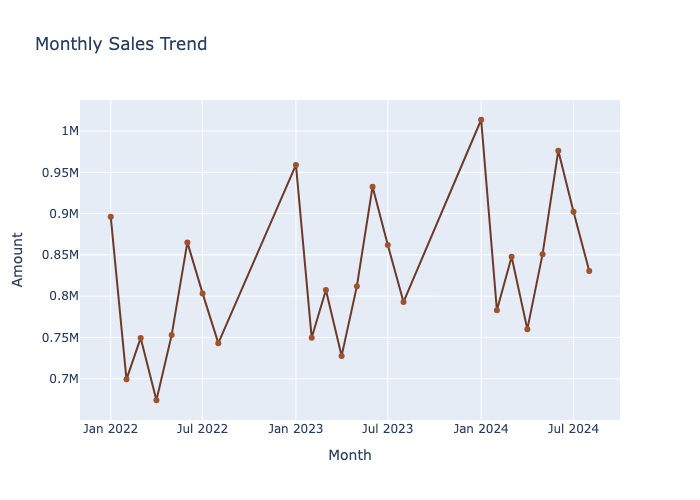

In [6]:
# Monthly Sales Trend
monthly_sales = df.groupby("Month", as_index=False)["Amount"].sum()
fig = go.Figure(go.Scatter(
    x=monthly_sales["Month"],
    y=monthly_sales["Amount"],
    mode="lines+markers",
    line_color=COLORS[0],
    marker_color=COLORS[2],
))
fig.update_layout(title="Monthly Sales Trend", xaxis_title="Month", yaxis_title="Amount")
fig.show()

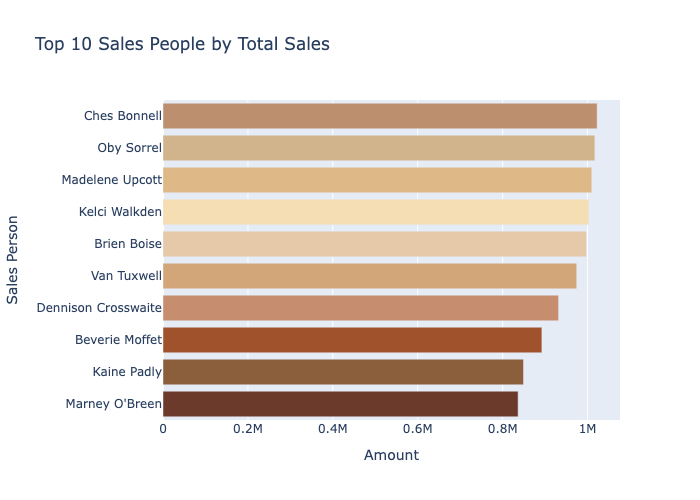

In [7]:
# Top 10 Sales People by Total Sales
top_sellers = df.groupby("Sales Person", as_index=False)["Amount"].sum().sort_values("Amount").tail(10)
fig = go.Figure(go.Bar(
    x=top_sellers["Amount"],
    y=top_sellers["Sales Person"],
    orientation="h",
    marker_color=COLORS[:len(top_sellers)],
))
fig.update_layout(title="Top 10 Sales People by Total Sales", xaxis_title="Amount", yaxis_title="Sales Person")
fig.show()

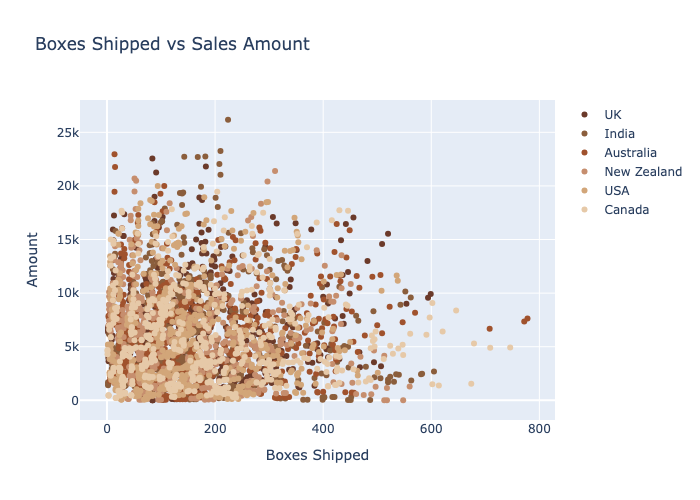

In [8]:
# Boxes Shipped vs Sales Amount (colored by Country)
fig = go.Figure()
for i, country in enumerate(df["Country"].unique()):
    subset = df[df["Country"] == country]
    fig.add_trace(go.Scatter(
        x=subset["Boxes Shipped"],
        y=subset["Amount"],
        mode="markers",
        name=country,
        marker_color=COLORS[i % len(COLORS)],
    ))
fig.update_layout(title="Boxes Shipped vs Sales Amount", xaxis_title="Boxes Shipped", yaxis_title="Amount")
fig.show()

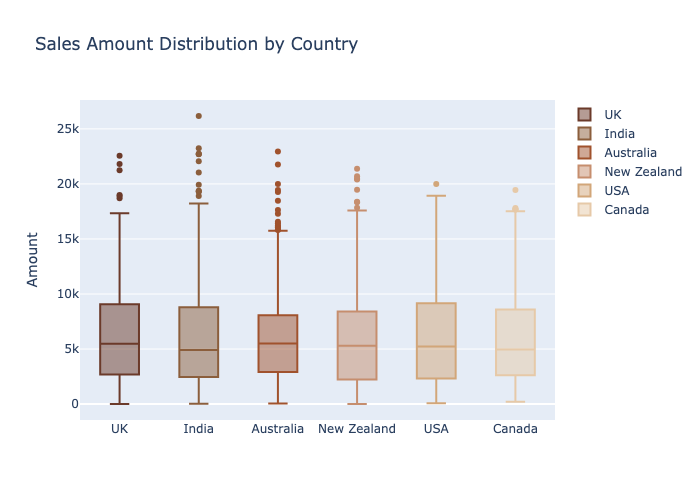

In [9]:
# Sales Amount Distribution by Country
fig = go.Figure()
for i, country in enumerate(df["Country"].unique()):
    subset = df[df["Country"] == country]
    fig.add_trace(go.Box(
        y=subset["Amount"],
        name=country,
        marker_color=COLORS[i % len(COLORS)],
    ))
fig.update_layout(title="Sales Amount Distribution by Country", yaxis_title="Amount")
fig.show()

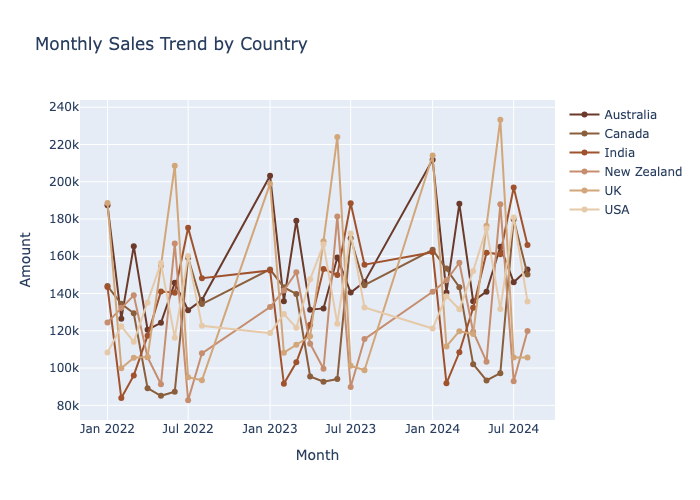

In [10]:
# Monthly Sales Trend by Country
monthly_country = df.groupby(["Month", "Country"], as_index=False)["Amount"].sum()
fig = go.Figure()
for i, country in enumerate(monthly_country["Country"].unique()):
    subset = monthly_country[monthly_country["Country"] == country]
    fig.add_trace(go.Scatter(
        x=subset["Month"],
        y=subset["Amount"],
        mode="lines+markers",
        name=country,
        marker_color=COLORS[i % len(COLORS)],
    ))
fig.update_layout(title="Monthly Sales Trend by Country", xaxis_title="Month", yaxis_title="Amount")
fig.show()

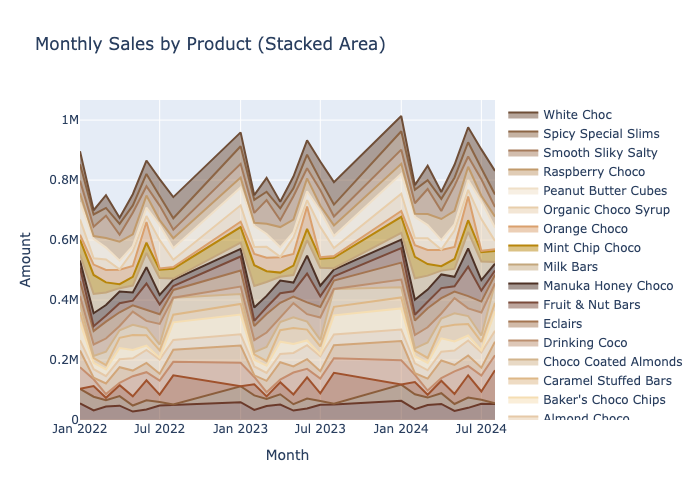

In [11]:
# Monthly Sales by Product (Stacked Area)
product_monthly = df.groupby(["Month", "Product"], as_index=False)["Amount"].sum()
fig = go.Figure()
for i, product in enumerate(product_monthly["Product"].unique()):
    subset = product_monthly[product_monthly["Product"] == product]
    fig.add_trace(go.Scatter(
        x=subset["Month"],
        y=subset["Amount"],
        mode="lines",
        name=product,
        stackgroup="one",
        line_color=COLORS[i % len(COLORS)],
    ))
fig.update_layout(title="Monthly Sales by Product (Stacked Area)", xaxis_title="Month", yaxis_title="Amount")
fig.show()